<a href="https://colab.research.google.com/github/stevend3/ECE492_Projects/blob/master/ECE492_team66_projectC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project C1
## Team 66

### Section 1: Loading the Data

In [1]:
# connect this notebook to google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


For the next line to work, go to Moodle, click the dataset link under `ProjC - Competition Project`. That will open up the data in Google Drive. Then, right click the folder name at the top of the screen and click `Add shortcut to Drive`. Navigate into `My Drive` and select the button in the bottom left of the pop-up window (it should be a folder with a plus sign in it). You will now be able to make a new folder. It must be titled `ECE492`. Finally, hit the `Add Shortcut` button. If this does not work, send me a slack message, and I can help debug.

In [2]:
cd '/content/drive/MyDrive/ECE492/ECE542_sp2022_Project_TerrainRecognition/'

/content/drive/.shortcut-targets-by-id/15qAg_VhIEGRIBGc6Uwr-dQssTLlpRNoO/ECE542_sp2022_Project_TerrainRecognition


In [3]:
!ls

ReadMe.txt  TestData  TrainingData  XVisualizeData.m


In [4]:
cd './TrainingData'

/content/drive/.shortcut-targets-by-id/15qAg_VhIEGRIBGc6Uwr-dQssTLlpRNoO/ECE542_sp2022_Project_TerrainRecognition/TrainingData


In [5]:
!ls

subject_001_01__x.csv	    subject_003_02__y.csv
subject_001_01__x_time.csv  subject_003_02__y_time.csv
subject_001_01__y.csv	    subject_003_03__x.csv
subject_001_01__y_time.csv  subject_003_03__x_time.csv
subject_001_02__x.csv	    subject_003_03__y.csv
subject_001_02__x_time.csv  subject_003_03__y_time.csv
subject_001_02__y.csv	    subject_004_01__x.csv
subject_001_02__y_time.csv  subject_004_01__x_time.csv
subject_001_03__x.csv	    subject_004_01__y.csv
subject_001_03__x_time.csv  subject_004_01__y_time.csv
subject_001_03__y.csv	    subject_004_02__x.csv
subject_001_03__y_time.csv  subject_004_02__x_time.csv
subject_001_04__x.csv	    subject_004_02__y.csv
subject_001_04__x_time.csv  subject_004_02__y_time.csv
subject_001_04__y.csv	    subject_005_01__x.csv
subject_001_04__y_time.csv  subject_005_01__x_time.csv
subject_001_05__x.csv	    subject_005_01__y.csv
subject_001_05__x_time.csv  subject_005_01__y_time.csv
subject_001_05__y.csv	    subject_005_02__x.csv
subject_001_05__y_time.cs

In [6]:
import pandas as pd
import numpy as np
import os

# create lists of file names for the data and labels
data_files = []
label_files = []
for file in os.listdir('./'):
  if file.endswith("y.csv"):
    label_files.append(file)
  elif file.endswith("x.csv"):
    data_files.append(file)

# sort the file names to keep all the data in chronological order
data_files.sort()
label_files.sort()

# make lists of the data from each csv
data_dfs = []
label_dfs = []
for i in range(len(data_files)):
  # load in the data and labels
  data_df = pd.read_csv(data_files[i], header=0, names=["accx", "accy", "accz", "gyrox", "gyroy", "gyroz"])
  label_df = pd.read_csv(label_files[i], header=0, names=["y"])

  # repeat every label 4 times to account for the difference in sampling rate
  label_df = label_df.loc[label_df.index.repeat(4)].reset_index(drop=True)

  # check the sizes of the dataframes
  len_diff = len(data_df) - len(label_df)
  # if lens are not same, repeat the last label until the lens are equal
  if len_diff != 0:
    # change df to a list to make appending faster and easier
    label_vals = label_df.values.tolist()
    for i in range(len_diff):
      label_vals.append([label_df.iloc[-1]["y"]])
    label_df = pd.DataFrame(label_vals, columns=["y"])  

  # append the dfs to the list of dfs
  data_dfs.append(data_df)
  label_dfs.append(label_df)

# turn the list of dfs into our data
df_train_data = pd.concat(data_dfs[:22], ignore_index=True)
df_train_labels = pd.concat(label_dfs[:22], ignore_index=True)

df_test_data = pd.concat(data_dfs[23:], ignore_index=True)
df_test_labels = pd.concat(label_dfs[23:], ignore_index=True)

In [7]:
df_train_data

,accx,accy,accz,gyrox,gyroy,gyroz
0,4.186920,8.344455,2.908057,0.005771,-0.004480,-0.003345
1,4.544637,8.408659,2.890000,0.007967,0.022412,0.001159
2,4.849308,8.411614,2.900692,0.027778,-0.010670,-0.014223
3,4.509190,8.118649,2.847298,0.021577,-0.045498,-0.021111
4,4.226515,8.273807,2.851742,0.012534,0.000445,-0.016830
...,...,...,...,...,...,...
1011520,-0.861944,7.698056,5.952084,-0.007159,0.010000,-0.001730
1011521,-0.907625,7.675875,5.934125,-0.003040,0.010524,-0.012222
1011522,-0.943233,7.700000,5.930000,-0.003915,-0.002274,-0.014444
1011523,-1.014965,7.611224,5.993741,-0.000914,-0.002222,-0.015358


In [8]:
df_test_data

,accx,accy,accz,gyrox,gyroy,gyroz
0,1.124535,8.919070,3.844535,-0.000100,-0.004707,-0.005131
1,1.151461,8.940000,3.772359,-0.003584,-0.002042,-0.005556
2,1.094937,8.897532,3.808702,0.001247,-0.008337,-0.007362
3,1.051347,8.920000,3.840000,0.001111,-0.009102,-0.004145
4,1.025552,8.945552,3.835552,-0.002965,0.002959,0.002965
...,...,...,...,...,...,...
270526,2.072244,8.908878,-3.500000,0.001351,0.001191,0.001031
270527,2.085123,8.915123,-3.520000,0.001918,-0.001147,0.000000
270528,2.083774,8.910000,-3.538981,-0.002015,-0.004099,0.001042
270529,2.111447,8.908553,-3.535724,0.000183,-0.001673,0.001856


Note, to obtain our training and test split, we are using the first 23 patient trials for the training data and the last 6 patient trails for the test data. 
In other words, subjects 1-5 are solely used for training and subject 6 trials 1 and 2 are also used for training. Subjects 7 and 8 are solely used for testing, and subject 6 trial 3 is also used for testing.

### Section 2: Visualizing the Data

Text(0.5, 1.0, 'Histogram of Frequency of Terrain Type in Training Data')

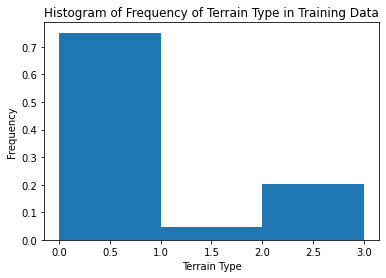

In [9]:
import matplotlib.pyplot as plt

plt.hist(df_train_labels["y"], bins=3, density=True)
plt.xlabel("Terrain Type")
plt.ylabel("Frequency")
plt.title("Histogram of Frequency of Terrain Type in Training Data")

Text(0.5, 1.0, 'Histogram of Frequency of Terrain Type in Test Data')

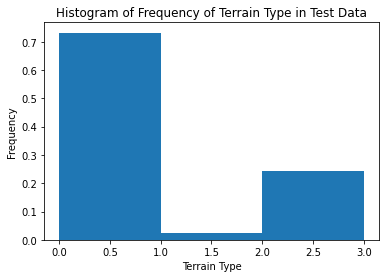

In [10]:
plt.hist(df_test_labels["y"], bins=3, density=True)
plt.xlabel("Terrain Type")
plt.ylabel("Frequency")
plt.title("Histogram of Frequency of Terrain Type in Test Data")

As we can see from the above histograms, the trainig and test data have approximately the same distribution of terrain types. Therefore, the trained model should still be able to perform well on the test data.

### Section 3: Training Models

In [11]:
def train_model(model, model_name):
  model.fit(df_train_data, df_train_labels["y"])

  y_pred = model.predict(df_test_data)

  accuracy = accuracy_score(df_test_labels["y"], y_pred)
  print("Accuracy for %s classifier: " % model_name, round(accuracy,3))

  f1 = f1_score(df_test_labels["y"], y_pred, average="weighted")
  print("Weighted F1 Score for all labels for %s classifier: " % model_name, round(f1,3))

  balanced_accuracy = balanced_accuracy_score(df_test_labels["y"], y_pred)
  print("Balanced Accuracy of %s classifier: " % model_name, round(balanced_accuracy,3))

#### Model 1: Baseline Performance

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, balanced_accuracy_score

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(df_train_data, df_train_labels["y"])

dummy_accuracy = dummy_clf.score(df_test_data, df_test_labels)
print("Accuracy for only predicting 0: ", round(dummy_accuracy,3))

y_pred_dummy = dummy_clf.predict(df_test_data)
dummy_f1 = f1_score(df_test_labels["y"], y_pred_dummy, average="weighted")
print("Weighted F1 Score for all labels for dummy classifier: ", round(dummy_f1,3))

dummy_balanced_accuracy = balanced_accuracy_score(df_test_labels["y"], y_pred_dummy)
print("Balanced Accuracy of dummy classifier: ", round(dummy_balanced_accuracy,3))

Accuracy for only predicting 0:  0.732
Weighted F1 Score for all labels for dummy classifier:  0.619
Balanced Accuracy of dummy classifier:  0.25


#### Model 2: XGBoost

In [13]:
# import xgboost as xgb
# from sklearn.metrics import accuracy_score

# xgb_model = xgb.XGBClassifier(objective="multi:softmax", num_class=3, eval_metric="mlogloss")
# xgb_model.fit(df_train_data, df_train_labels["y"])

# y_pred_xgb = xgb_model.predict(df_test_data)

# xgb_accuracy = accuracy_score(df_test_labels["y"], y_pred_xgb)
# print("Accuracy for XGB classifier: ", round(xgb_accuracy,3))

# xgb_f1 = f1_score(df_test_labels["y"], y_pred_xgb, average="weighted")
# print("Weighted F1 Score for all labels for XGB classifier: ", round(xgb_f1,3))

# xgb_balanced_accuracy = balanced_accuracy_score(df_test_labels["y"], y_pred_xgb)
# print("Balanced Accuracy of XGB classifier: ", round(xgb_balanced_accuracy,3))

XGBoost takes a while to train, so here were the results:

Accuracy for XGB classifier:  0.721

Weighted F1 Score for all labels for XGB classifier:  0.666

Balanced Accuracy of XGB classifier:  0.409

#### Model 3: SVM

In [14]:
# from sklearn import svm

# svm_clf = svm.SVC()
# model_name = "SVM"
# svm_clf.fit(df_train_data, df_train_labels["y"])

# y_pred_svm = svm_clf.predict(df_test_data)

# accuracy_svm = accuracy_score(df_test_labels["y"], y_pred_svm)
# print("Accuracy for %s classifier: " % model_name, round(accuracy_svm,3))

# f1_svm = f1_score(df_test_labels["y"], y_pred_svm, average="weighted")
# print("Weighted F1 Score for all labels for %s classifier: " % model_name, round(f1_svm,3))

# balanced_accuracy_svm = balanced_accuracy_score(df_test_labels["y"], y_pred_svm)
# print("Balanced Accuracy of %s classifier: " % model_name, round(balanced_accuracy_svm,3))

This took way to long to train, so I stopped it. It probably won't be better than deep learning anyway

#### Model 4: LSTM

In [29]:
df_train_data.shape

(1011525, 6)

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_train_data_norm = pd.DataFrame(scaler.fit_transform(df_train_data), columns=df_train_data.columns)
df_test_data_norm = pd.DataFrame(scaler.fit_transform(df_test_data), columns=df_test_data.columns)

In [43]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import backend as K
from keras.optimizers import SGD

# Define the number of time steps and the number of features
# In this case, 6 features (3 accelerometer axes and 3 gyroscope axes)
features = df_train_data.shape[1]
n_outputs = 3
epochs, batch_size, verbose = 1, 128, 2

# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(features, 1)))
# lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(n_outputs, activation='softmax'))

# Compile the model
lstm_model.compile(optimizer=SGD(lr=0.01, momentum=0.9, clipnorm=1), 
                   loss='sparse_categorical_crossentropy', 
                   metrics=['sparse_categorical_accuracy'])

# Train the model
lstm_model.fit(df_train_data_norm, df_train_labels["y"], epochs=epochs, batch_size=batch_size, verbose=verbose)

# Evaluate the model
# results = lstm_model.evaluate(df_test_data, df_test_labels["y"], batch_size=batch_size, verbose=0)
y_pred_lstm = lstm_model.predict(df_test_data_norm, verbose = 0)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


7903/7903 - 35s - loss: nan - sparse_categorical_accuracy: 0.7510 - 35s/epoch - 4ms/step


KeyboardInterrupt: ignored

In [34]:
# use this to delte the model. It's helpful if the training fails
# keras.backend.clear_session()

In [33]:
y_pred_lstm

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       ...,
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32)

In [38]:
df_train_data.isna().sum()

accx     0
accy     0
accz     0
gyrox    0
gyroy    0
gyroz    0
dtype: int64